In [1]:
from PhyConvNet import PhyConvNet
from train_utils import load_checkpoint
import scipy.io as scio
import torch
import numpy as np

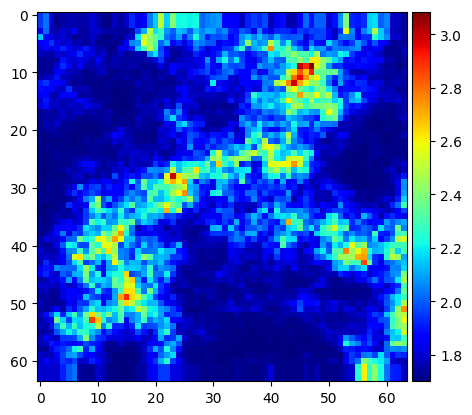

In [2]:
Nx= 64
Ny =64
import matplotlib.pyplot as plt
TRUE_PERM = scio.loadmat('/scratch/user/jungangc/PICNN-2phase/PICNN-2phaseflow-constBHP-64by64-heter-TransferLearning-50stepsby2-final/Codes/system/TRUE_PERM_64by64.mat')
Perm = torch.tensor(TRUE_PERM['TRUE_PERM'], dtype=torch.float32).cuda()
# Perm = torch.tensor(0.10*np.ones((Nx, Ny)), dtype=torch.float32).cuda()
from mpl_toolkits.axes_grid1 import make_axes_locatable
ax = plt.subplot()
# im = ax.imshow((output_p[10].cpu().detach().numpy().squeeze()), cmap='jet', vmin=2500, vmax=4000)
im = ax.imshow(np.log10(((Perm)*1000).cpu().detach().numpy().squeeze()), cmap='jet')
# create an Axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

plt.show()

In [3]:
BHPmat = scio.loadmat('BHP_full.mat')
BHP_vec = torch.tensor(BHPmat['BHP_full'], dtype=torch.float32).cuda() 

# Rate  = np.array([[100]]) # [STB/day]
# Rate_vec =      torch.tensor(Rate, dtype=torch.float32).repeat(1,300).cuda()
Rate = scio.loadmat('Qinj_full.mat')
Rate_vec = torch.tensor(Rate['Qinj_full'], dtype=torch.float32).cuda() 

time_sim = 50
dt = 2
# latent_size =200
# source BHP 
BHP = np.zeros((time_sim,1,64,64))
source_BHP = torch.tensor(BHP, dtype=torch.float32).cuda()
source_BHP[:,0, 49, 49]=BHP_vec[0,:time_sim*dt:dt]
source_BHP[:,0, 12, 12] = BHP_vec[1,:time_sim*dt:dt] 

rate = np.zeros((time_sim,1,64,64))
Qinj = torch.tensor(rate, dtype=torch.float32).cuda()
Qinj[:, 0,31,31] = Rate_vec[0,:time_sim*dt:dt]
Qinj[:, 0,12,49] = Rate_vec[1,:time_sim*dt:dt] 
Qinj[:, 0,49,12] = Rate_vec[2,:time_sim*dt:dt]
# TRUE_PERM = scio.loadmat('/scratch/user/jungangc/PICNN-2phase/PICNN-2phaseflow-constBHP-64by64-homo-AR-explicit/Codes/system/TRUE_PERM_64by220.mat')
# Perm = torch.tensor(TRUE_PERM['TRUE_PERM'], dtype=torch.float32).cuda()
# Perm = torch.tensor(0.05*np.ones((Nx, Ny)), dtype=torch.float32).cuda()

Tmap = torch.tensor(np.zeros((time_sim,1,64,64)), dtype=torch.float32).cuda()
for k in range(time_sim):
    Tmap[k:k+1,...] = torch.tensor(np.ones((1,1,64,64))*(k+1)*dt, dtype=torch.float32).cuda()


In [4]:
model = PhyConvNet(num_classes=1, in_channels=2, time_sim = time_sim).cuda()

In [5]:
sum(p.numel() for p in model.parameters() if p.requires_grad)

10862850

In [6]:
data_dir_p = '/scratch/user/jungangc/PICNN-2phase/PICNN-2phaseflow-constBHP-64by64-heter-TransferLearning-50stepsby2-final/Datasets/data/twophaseflow/pressure_101x1x64x64.mat'  
data_dir_sw = '/scratch/user/jungangc/PICNN-2phase/PICNN-2phaseflow-constBHP-64by64-heter-TransferLearning-50stepsby2-final/Datasets/data/twophaseflow/saturation_101x1x64x64.mat' 
data_p = scio.loadmat(data_dir_p)
data_sw = scio.loadmat(data_dir_sw)
# uv = data['uv'] # [t,c,h,w]  
p = data_p['Psim'] # [t,c,h,w]  
sw = data_sw['Swsim'] # [t,c,h,w] 

# initial conidtion
p0 = torch.tensor(p[0:1,...], dtype=torch.float32).cuda()
# p0=p0/3000
sw0 = torch.tensor(sw[0:1,...], dtype=torch.float32).cuda()



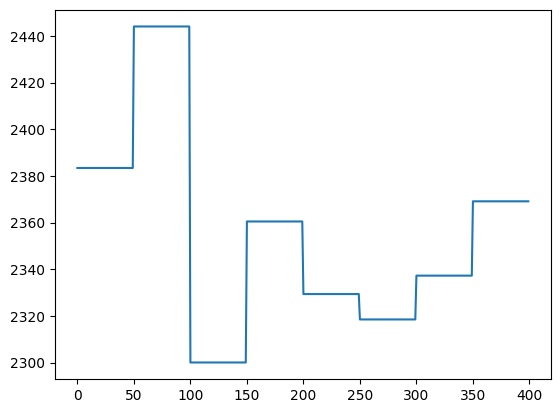

In [7]:
import matplotlib.pyplot as plt
plt.plot(BHP_vec[0,:].detach().cpu().numpy())

In [8]:
outputs =[]
outputs.append(torch.cat((p0, sw0), dim=1))
for k in range(time_sim):
    model_save_path = '/scratch/user/jungangc/PICNN-2phase/PICNN-2phaseflow-constBHP-64by64-heter-TransferLearning-50stepsby2-final/Codes/model/checkpoint2000_{}.pt'.format(k)
    model, _, _ = load_checkpoint(model, optimizer=None, scheduler=None, save_dir=model_save_path) 
    xp ,xs = model(p0, sw0, source_BHP[k:k+1,...], Qinj[k:k+1,...], Tmap)
    p0 =xp
    sw0=xs
    outputs.append(torch.cat((xp, xs), dim=1))

Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!
Pretrained model loaded!


In [36]:
k=50

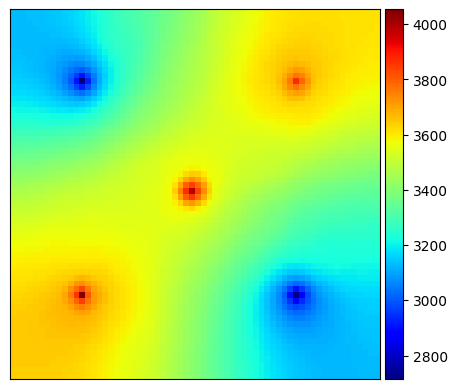

In [37]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
ax = plt.subplot()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xticks([])
ax.set_yticks([])
# im = ax.imshow((output_p[10].cpu().detach().numpy().squeeze()), cmap='jet', vmin=2500, vmax=4000)
im = ax.imshow(outputs[k][:,0,:,:].cpu().detach().numpy().squeeze(), cmap='jet', vmin=np.min(p[k*dt]), vmax=np.max(p[k*dt]))
# create an Axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

plt.show()

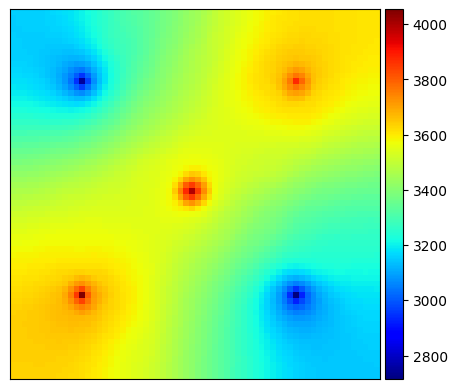

In [38]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
ax = plt.subplot()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xticks([])
ax.set_yticks([])
im = ax.imshow(p[k*dt].squeeze(), cmap='jet', vmin=np.min(p[k*dt]), vmax=np.max(p[k*dt]))

# create an Axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

plt.show()

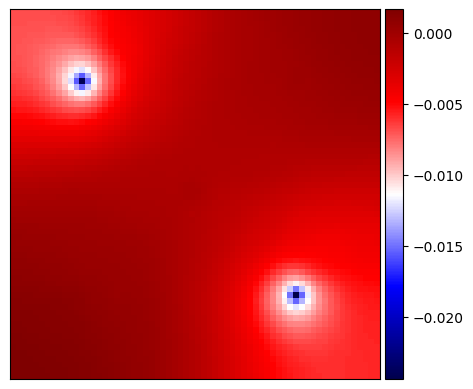

In [39]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
ax = plt.subplot()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xticks([])
ax.set_yticks([])
im = ax.imshow(((outputs[k][:,0,...].cpu().detach().numpy()-p[k*dt])/p[k*dt]).squeeze(), cmap='seismic')

# create an Axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

plt.show()

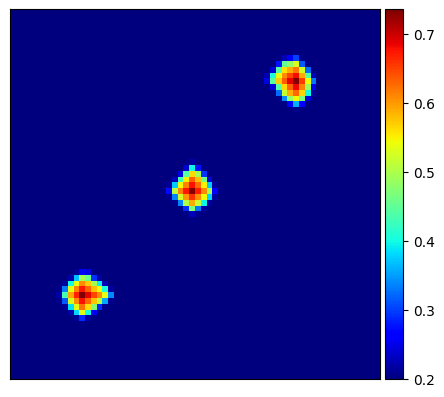

In [40]:
ax = plt.subplot()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xticks([])
ax.set_yticks([])
# im = ax.imshow((output_p[10].cpu().detach().numpy().squeeze()), cmap='jet', vmin=2500, vmax=4000)
im = ax.imshow((outputs[k][:,1,:,:].cpu().detach().numpy().squeeze()), cmap='jet', vmin=np.min(sw[k*dt]), vmax=np.max(sw[k*dt]))
# create an Axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

plt.show()

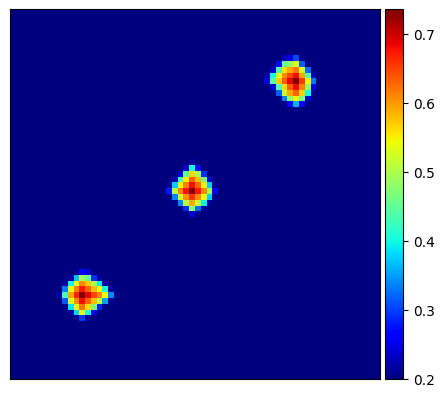

In [41]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
ax = plt.subplot()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xticks([])
ax.set_yticks([])
im = ax.imshow(sw[k*dt].squeeze(), cmap='jet', vmin=np.min(sw[k*dt]), vmax=np.max(sw[k*dt]))

# create an Axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

plt.show()

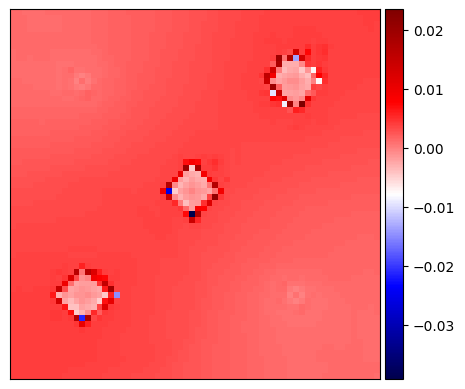

In [42]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
ax = plt.subplot()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xticks([])
ax.set_yticks([])
im = ax.imshow(((outputs[k][:,1,...].cpu().detach().numpy()-sw[k*dt])/sw[k*dt]).squeeze(), cmap='seismic')

# create an Axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

plt.show()